With this, we first start by navigating over to the City of Chicago's Crimes dataset and focus on the crime Gambling. 

We then train a KMeans model to find and plot seven clusters which could be places a police officer should investigate to check for on-going illegal activities.

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import os
from sklearn.cluster import KMeans
import pandas as pd

# Look Pretty
matplotlib.style.use('ggplot')
plt.style.use('ggplot')

Few things to know about the parameters used while training the KMeans model.
1. n_clusters: The number of clusters to form as well as the number of centroids to generate. 
2. init: Can take a value from three values -- random, k-means++, ndarray. 
   'random' chooses k observations (rows) at random from data for the initial centroids.
3. n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the        best output of n_init consecutive runs in terms of inertia.
4. max_iter: Maximum number of iterations of the k-means algorithm for a single run.
5. random_state: can take a value from three values -- an int, a RandomState instance or None. For an int random_state is      the seed used by the random number generator.

One more term to know is cluster_centers_ which are nothing but the coordinates of cluster centers

In [2]:
def doKMeans(df):
    #
    # Plotting data with a '.' marker, with 0.3 alpha at the Longitude,
    # and Latitude locations in the dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

    #
    # Filtering df to look at Longitude and Latitude,
    df = df.filter(items=['Longitude', 'Latitude'])

    #
    # Using K-Means to try and find cluster centers
    # 
    model = KMeans(n_clusters = 7,  init = 'random', n_init = 60, max_iter = 360, random_state = 43)
    model.fit_predict(df)

    #
    # Printing and plotting the centroids
    centroids = model.cluster_centers_
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='blue', alpha=0.5, linewidths=3, s=169)
    print (centroids)

In [3]:
# Loading the dataset
df = pd.read_csv("Datasets\\Crimes_-_2001_to_present.csv", header = 0, sep=',')

# Dropping any ROWs with nans in them
df.dropna(axis=0, inplace = True)

In [4]:
# Printing out the dtypes and checking for errors
print(df.dtypes)

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object


In [5]:
# Changing the dtype of date from string to date
df.Date = pd.to_datetime(df.Date, errors = 'coerce')
print(df.dtypes)

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object


[[-87.58269159  41.75269597]
 [-87.66471681  41.77278754]
 [-87.70951082  41.87814391]
 [-87.68497554  41.98182473]
 [-87.61954181  41.80355483]
 [-87.63113621  41.69661301]
 [-87.7568795   41.89342602]]


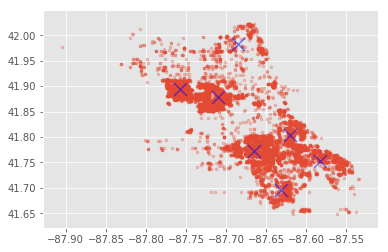

In [6]:
# Printing & Plotting the data
doKMeans(df)

In [7]:
# Filtering out the data by a date to see if our centers are changing
df2 = df[df.Date > '2011-01-01']
print(df2.dtypes)

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object


[[-87.68654787  41.98439273]
 [-87.75480015  41.88995017]
 [-87.58037378  41.75062021]
 [-87.66489656  41.77582701]
 [-87.63500787  41.70540614]
 [-87.61913725  41.79183807]
 [-87.71034124  41.87526893]]


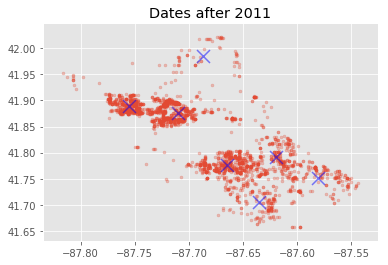

In [8]:
# Printing & Plotting the data
doKMeans(df2)
plt.title("Dates after 2011")
plt.show()